# Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.

Mario Javier Soriano Aguilera A01384282

In [1]:
from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd

Mounted at /content/gdrive
/content


In [3]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/MachineLearning/NN/Cancer_Data.csv')

Las características (features) incluyen información sobre las características visuales de las células cancerosas, como el radio medio, la textura media, el perímetro medio, el área media, la suavidad media, la compacidad media, la concavidad media, los puntos cóncavos medios, etc. Todas son variables numericas.

Las etiquetas (labels) están representadas por la columna "diagnosis" una variable categorica, que contiene dos categorías: "B" para benigno y "M" para maligno. Esta será la variable objetivo que deseas predecir.

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
len(df)

569

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [9]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Text(0.5, 0, 'Make of the cars')

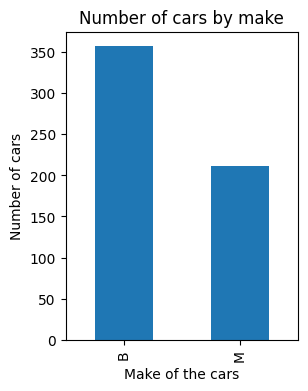

In [11]:
df.diagnosis.value_counts().plot(kind='bar', figsize=(3,4))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make of the cars')

<Axes: >

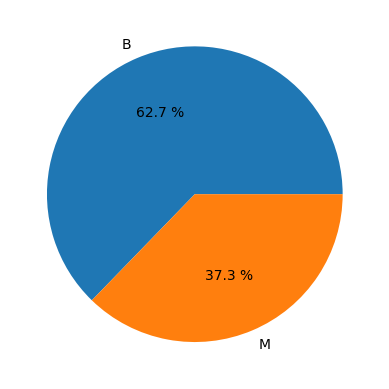

In [12]:
df.groupby('diagnosis').size().plot(kind='pie', autopct="%0.1f %%",labels = ['B', 'M'])

In [13]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
Tcorrelation = df.corr(method='pearson')
Tcorrelation

<ipython-input-14-6004b698a5e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tcorrelation = df.corr(method='pearson')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [15]:
c = df.corr()
threshold = .80
np.abs(c.values) > threshold
[f"{c.columns[i]} and {c.columns[j]}" for i, j in zip(*np.where(np.abs(c.values) > threshold)) if i < j]

<ipython-input-15-82f4f33533eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


['radius_mean and perimeter_mean',
 'radius_mean and area_mean',
 'radius_mean and concave points_mean',
 'radius_mean and radius_worst',
 'radius_mean and perimeter_worst',
 'radius_mean and area_worst',
 'texture_mean and texture_worst',
 'perimeter_mean and area_mean',
 'perimeter_mean and concave points_mean',
 'perimeter_mean and radius_worst',
 'perimeter_mean and perimeter_worst',
 'perimeter_mean and area_worst',
 'area_mean and concave points_mean',
 'area_mean and area_se',
 'area_mean and radius_worst',
 'area_mean and perimeter_worst',
 'area_mean and area_worst',
 'smoothness_mean and smoothness_worst',
 'compactness_mean and concavity_mean',
 'compactness_mean and concave points_mean',
 'compactness_mean and compactness_worst',
 'compactness_mean and concavity_worst',
 'compactness_mean and concave points_worst',
 'concavity_mean and concave points_mean',
 'concavity_mean and concavity_worst',
 'concavity_mean and concave points_worst',
 'concave points_mean and radius_wo

In [16]:
labels = df[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean', 'texture_mean']]

Se realizo un análisis exploratorio rápida al dataset para poder ser utilizado para mi modelo. Se puede observar cómo están balanceadas las variables a predecir, estadística descriptiva a variables numéricas, donde se puede observar cantidad de features, media, valor máximo, valor mínimo, desviación estándar, división por cuantiles. Y una matriz de correlación entre los labels numéricos, se escogieron los 6 labels que más se repetían con una correlación del 80% (esto puede causar multicolinealidad, pero en esta entrega se busca hacer un análisis estadístico riguroso).

## Red Neuronal


Se seguirá la misma secuencia vista en clase pero con otro tipo de dataset, ahora se hará mención de cómo es que funciona la red neuronal describiendo lo que se está realizando y como es que se utilizan distintos métodos para mejorar los parámetros e hiperparámetros de la red neuronal, junto con sus resultados con respecto a la predicción.

En el siguiente código se preparan los datos para entrenar y evaluar un modelo de clasificación binaria mediante el escalado de características y la división de los datos.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(labels)
y = df['diagnosis'] = np.where(df['diagnosis']=='M',1,0)
print('# of samples:', len(X))
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)
print('\nX_train {}:\n{} ...'.format(X_train.shape, X_train[:5]))
print('\ny_train {}:\n{} ...'.format(y_train.shape, y_train[:5]))
# Turn 'y' classes into vectors with one-hot encoding using keras
#y_train = tf.keras.utils.to_categorical(np.array(y_train))
#y_test = tf.keras.utils.to_categorical(np.array(y_test))
print('\ny_train {}:\n{} ...'.format(y_train.shape, y_train[:5]))

# of samples: 569

X_train (455, 6):
[[-0.1809999  -0.2083826  -0.26703025 -0.51853113 -0.38895122  0.700529  ]
 [-1.02736221 -0.96092756 -0.91207272  0.49196175 -0.47046021  0.20951784]
 [-0.60418105 -0.62605123 -0.6040564  -0.75504559 -0.76012663  2.08047981]
 [ 0.13141571  0.1821005   0.00628802  0.54313075 -0.2981564   0.78895755]
 [-1.26650216 -1.27314927 -1.04830523 -0.94872971 -1.1130141  -0.27683919]] ...

y_train (455,):
[0 0 0 0 0] ...

y_train (455,):
[0 0 0 0 0] ...


Esta es una red neuronal con múltiples capas ocultas que utilizan la función de activación ReLU. Tiene una capa de entrada con 64 neuronas, seguida de capas ocultas con 128 neuronas cada una. Luego, hay capas adicionales con 64 neuronas. La capa de salida tiene una neurona y usa una función sigmoide. Es adecuada para problemas de clasificación binaria.

In [ ]:
def set_nn_model_architecture_1():
  # Define Model
  model = Sequential(name='my_sequential_model_1')
  # Hidden Layer 1: Fully-connected layer w/64 units. Need to specify the
  # expected input data shape (4,), initialize parameters, & set activation function
  model.add(Dense(units=64, input_shape=X_train[0].shape, activation='relu',
                  kernel_initializer=tf.keras.initializers.HeUniform(seed=0), # W
                  bias_initializer='ones', # b
                  name='hiddenlayer1'))
  # Rest of the hidden layers configurations (units and activations functions)
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer2'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer3'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer4'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer5'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer6'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer7'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer8'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer9'))
  model.add(Dense(units=1, activation = 'sigmoid', name='outputlayer'))
  model.summary()
  return model

model_1 = set_nn_model_architecture_1()

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer6 (Dense)        (None, 64)                8256      
                                                                 
 hiddenlayer7 (Dense)        (None, 64)      

El siguiente código, está configurando dos optimizadores diferentes para el modelo de red neuronal. Uno es el optimizador Stochastic Gradient Descent (SGD) con una tasa de aprendizaje de 0.0001, y el otro es el optimizador Adam con la misma tasa de aprendizaje. Luego, se esta compilando el modelo utilizando el optimizador sgd, ya que en clase se utilizo Adam, de todas formas al final se utilizara para comparar resultados y tambien se esta especificando la función de pérdida como la entropía cruzada binaria y la métrica de precisión (accuracy) para evaluar el rendimiento del modelo durante el entrenamiento.

In [ ]:
# Define optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.0001)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_1.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

## SGD

In [ ]:
training_history_1 = model_1.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40)

Epoch 1/800
10/10 [==============================] - 2s 46ms/step - loss: 0.7117 - accuracy: 0.1943 - val_loss: 0.7125 - val_accuracy: 0.2609
Epoch 2/800
10/10 [==============================] - 0s 9ms/step - loss: 0.7114 - accuracy: 0.1917 - val_loss: 0.7121 - val_accuracy: 0.2609
Epoch 3/800
10/10 [==============================] - 0s 9ms/step - loss: 0.7110 - accuracy: 0.1917 - val_loss: 0.7117 - val_accuracy: 0.2609
Epoch 4/800
10/10 [==============================] - 0s 10ms/step - loss: 0.7107 - accuracy: 0.1969 - val_loss: 0.7113 - val_accuracy: 0.2609
Epoch 5/800
10/10 [==============================] - 0s 9ms/step - loss: 0.7104 - accuracy: 0.1995 - val_loss: 0.7110 - val_accuracy: 0.2609
Epoch 6/800
10/10 [==============================] - 0s 10ms/step - loss: 0.7100 - accuracy: 0.2021 - val_loss: 0.7106 - val_accuracy: 0.2609
Epoch 7/800
10/10 [==============================] - 0s 10ms/step - loss: 0.7097 - accuracy: 0.1969 - val_loss: 0.7102 - val_accuracy: 0.2609
Epoch 8/8

### Learning Curve

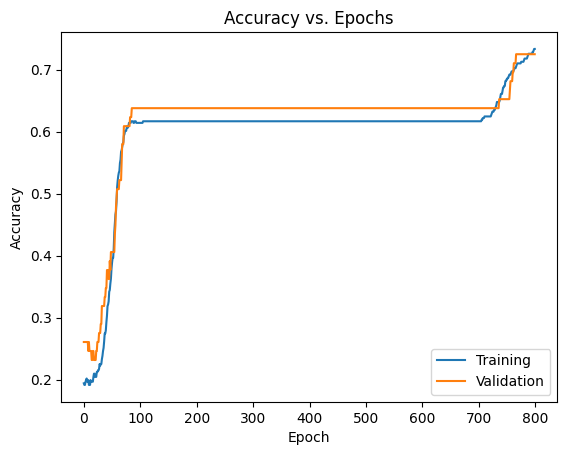

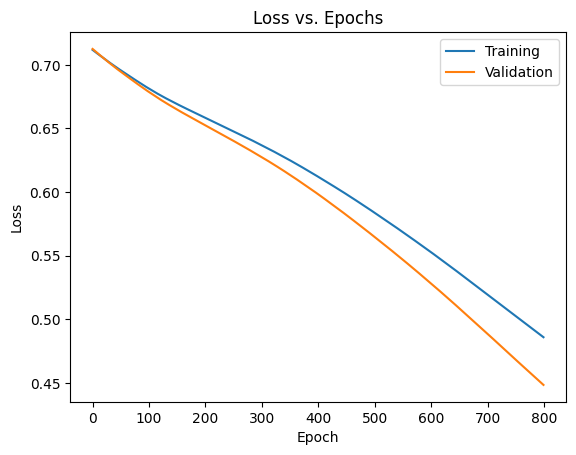

In [ ]:
def plot_acc_loss(training_history):
  plt.plot(training_history.history['accuracy'])
  plt.plot(training_history.history['val_accuracy'])
  # plt.ylim([0, 1])
  plt.title('Accuracy vs. Epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show()
  plt.plot(training_history.history['loss'])
  plt.plot(training_history.history['val_loss'])
  plt.title('Loss vs. Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()
plot_acc_loss(training_history_1)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.4439
test_acc: 81.5789 %


El modelo parece estar haciendo un progreso rapido en las primeras epocas pero luego el accuracy junto con loss tiene un estancamiento, depues empieza a mejorar un poco mas el modelo. Este tipo de optimizador SGD suele ser muy sensible en los hiperparámetros.

### Introducing Dropout and Batch Normalization to reduce Overfitting

El código define un modelo de red neuronal que utiliza batch normalization y dropout para reducir el overfitting. Este modelo tiene las mismas caracteristicas que el modelo anterior solo que ahora se esta aplicando lo anterior mencionado. batch normalization por lotes se aplica después de la quinta capa, y las capas de dropout se utilizan para evitar el overfitting durante el entrenamiento.

In [ ]:
def set_nn_model_architecture_2():
  model = Sequential(name='my_sequential_model_1')
  model.add(Dense(units=64, input_shape=X_train[0].shape, activation='relu', kernel_initializer=tf.keras.initializers.HeUniform(seed=0), bias_initializer='ones', name='hiddenlayer1'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer2'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer3'))
  model.add(Dropout(rate=0.3, seed=44, name='dropout1'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer4'))
  model.add(Dense(units=128, activation = 'relu', name='hiddenlayer5'))
  model.add(BatchNormalization(name='batch_normalization'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer6'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer7'))
  model.add(Dropout(rate=0.3, seed=44, name='dropout2'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer8'))
  model.add(Dense(units=64, activation = 'relu', name='hiddenlayer9'))
  model.add(Dense(units=1, activation = 'sigmoid', name='outputlayer'))
  model.summary()
  return model

model_2 = set_nn_model_architecture_2()

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
training_history_2 = model_2.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40)

Epoch 1/800
10/10 [==============================] - 2s 29ms/step - loss: 0.6795 - accuracy: 0.5855 - val_loss: 0.6757 - val_accuracy: 0.6377
Epoch 2/800
10/10 [==============================] - 0s 9ms/step - loss: 0.6857 - accuracy: 0.5725 - val_loss: 0.6767 - val_accuracy: 0.6377
Epoch 3/800
10/10 [==============================] - 0s 8ms/step - loss: 0.6752 - accuracy: 0.5699 - val_loss: 0.6778 - val_accuracy: 0.6377
Epoch 4/800
10/10 [==============================] - 0s 9ms/step - loss: 0.6567 - accuracy: 0.6036 - val_loss: 0.6786 - val_accuracy: 0.6377
Epoch 5/800
10/10 [==============================] - 0s 10ms/step - loss: 0.6695 - accuracy: 0.5725 - val_loss: 0.6791 - val_accuracy: 0.6377
Epoch 6/800
10/10 [==============================] - 0s 9ms/step - loss: 0.6583 - accuracy: 0.5984 - val_loss: 0.6797 - val_accuracy: 0.6667
Epoch 7/800
10/10 [==============================] - 0s 9ms/step - loss: 0.6769 - accuracy: 0.5674 - val_loss: 0.6814 - val_accuracy: 0.7101
Epoch 8/800

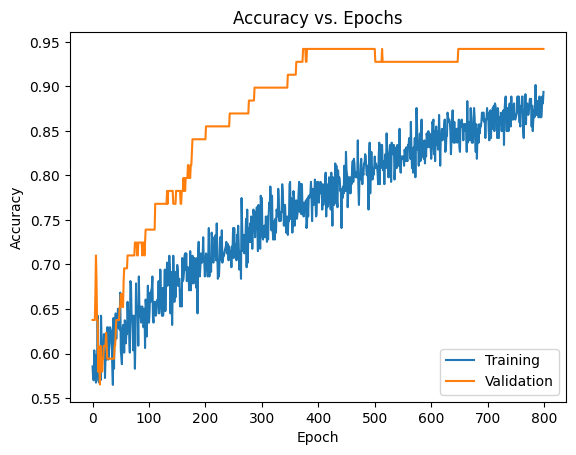

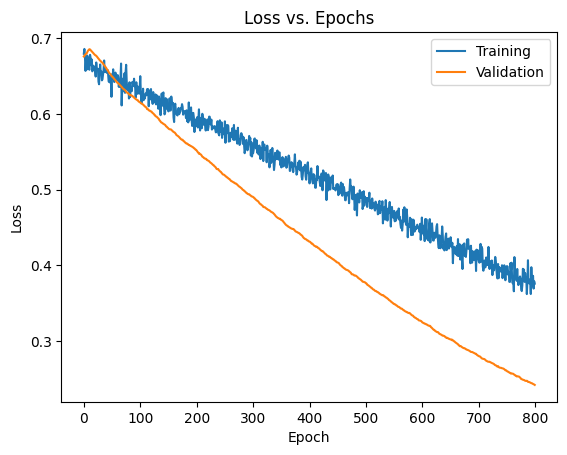

In [ ]:
plot_acc_loss(training_history_2)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_2.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.2504
test_acc: 94.7368 %


El modelo parece estar haciendo un mejor progreso que el anterior implementando Dropout y Batch Normalization, disminuyendo la perdida y aumentando la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación a medida que avanza en las épocas, pero aun nuestro modelo no esta convergiendo que es lo que buscamos. Vemos como SGD necesita tener mas epocas o un learning rate mas alto para que tenga mejor ajuste nuestro modelo.

### Regularization using Callbacks: Earlystopping & learning rate reduction



In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 30, mode =  "min") # if model doesn't improve its performance on validation set in 30 epochs, stop training
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(patience = 20, factor = 0.2)

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

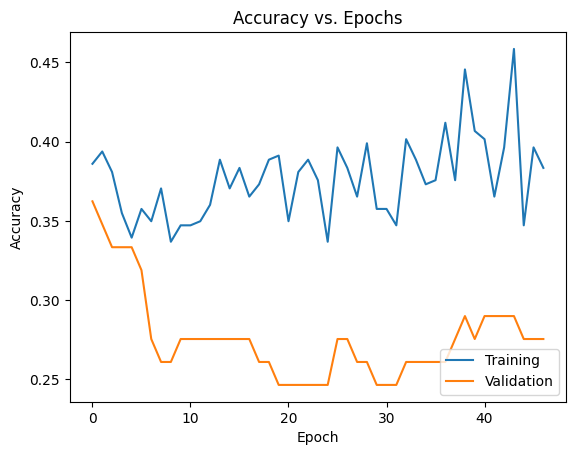

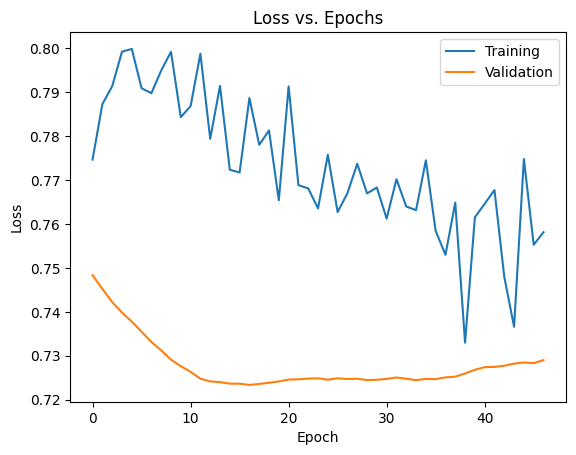

In [ ]:
model_3 = set_nn_model_architecture_2()
model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

training_history_3 = model_3.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_3)


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.3832
test_acc: 94.7368 %


Al implimentar las tecnicas de earlystopping, learning rate reduction, el modelo al implementar earlystopping y tener un learning rate muy bajo implementado con el optimizador SGD vemos que el ajuste del modelo se detiene pronto, siendo no muy bueno en los datos de entrenamiento y validacion pero si en los datos de prueba, se cree que esto se debe a que no se dieron proporciones adecuadas a los datos de validacion, entrenamiento y prueba. Esto sera modificado en los ultimos modelos

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

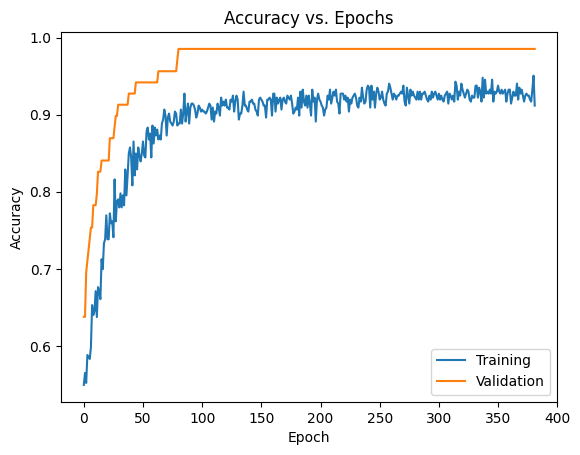

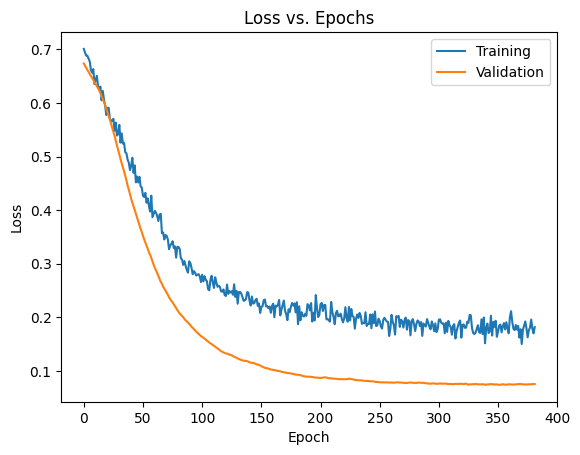

In [ ]:
model_4 = set_nn_model_architecture_2()
model_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

training_history_4 = model_4.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_4)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_4.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.1118
test_acc: 96.4912 %


Se puede apreciar como ahora nuestro modelo si esta convergiendo en los graficos de accuracy y loss indicando que si identificando los patrones y aprendiendo adecuadamente nuestro modelo. Pero se esta ajustando muy lento.

## Adam

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer6 (Dense)        (None, 64)                8256      
                                                                 
 hiddenlayer7 (Dense)        (None, 64)      

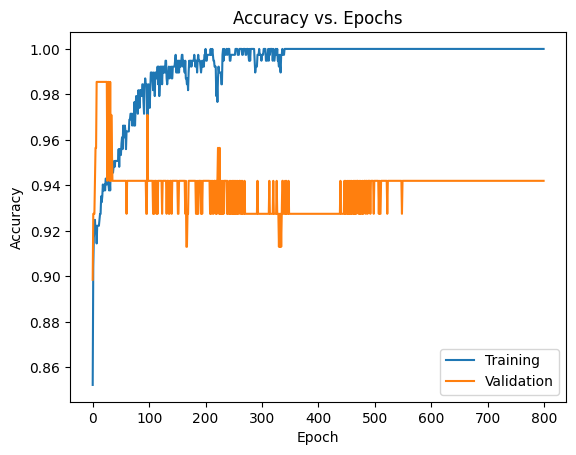

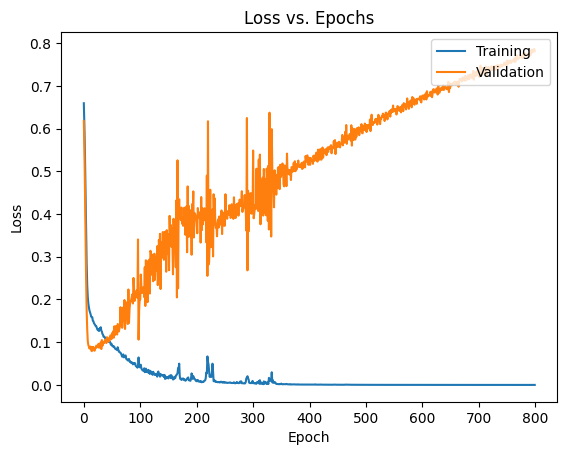

In [ ]:
model_5 = set_nn_model_architecture_1()
model_5.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

training_history_5 = model_5.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40)

plot_acc_loss(training_history_5)


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_5.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.6954
test_acc: 92.9825 %


Nuestro modelo muestra claramente overfitting

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

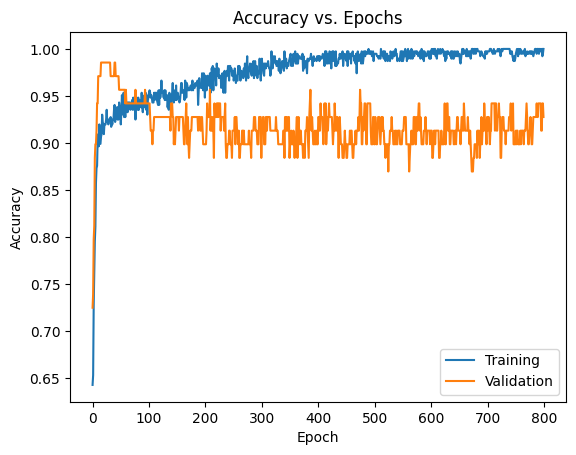

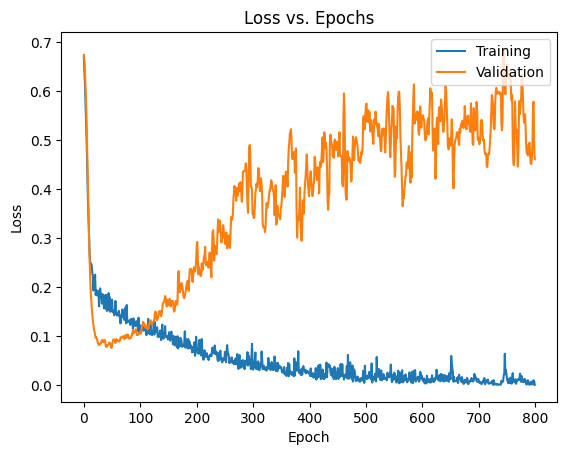

In [ ]:
model_6 = set_nn_model_architecture_2()
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

training_history_6 = model_6.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40)
plot_acc_loss(training_history_6)


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_6.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.3718
test_acc: 96.4912 %


Igual overfitting pero se ve mejora en la convergencia de los graficos

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

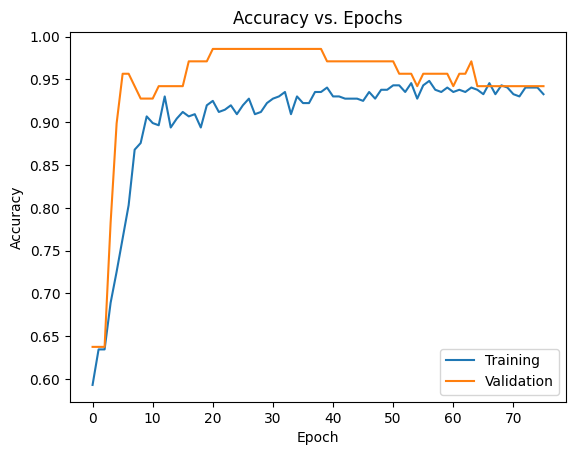

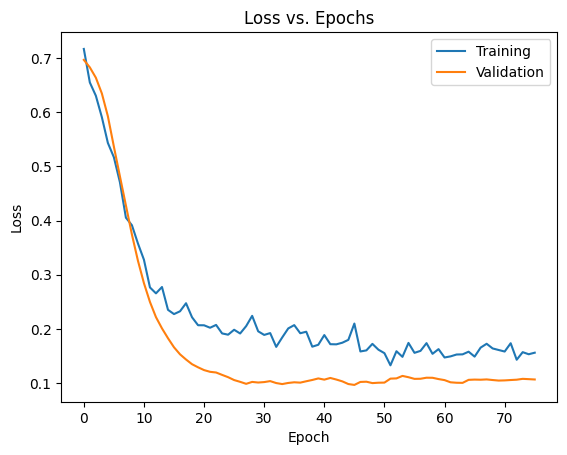

In [ ]:
model_7 = set_nn_model_architecture_2()
model_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

training_history_7 = model_7.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_7)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_7.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.0982
test_acc: 95.614 %


El modelo se detiene pero se puede ver que tenemos algo de overfitting, para evitarlo se puede hacer que tenga menos paciencia en el numero de epocas y asi podriamos lograr un mejor modelo.

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

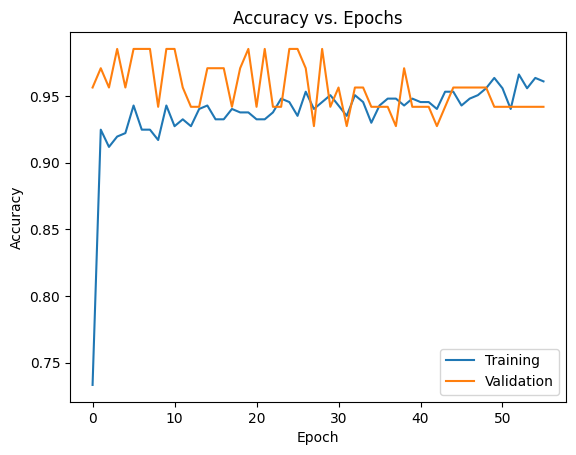

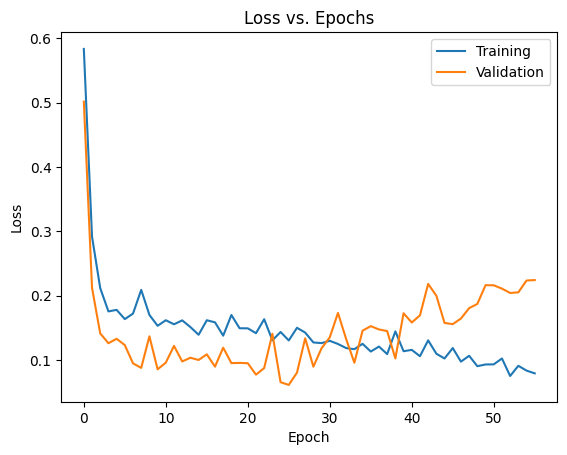

In [ ]:
model_8 = set_nn_model_architecture_2()
model_8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

training_history_8 = model_8.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=40,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_8)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_8.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.0871
test_acc: 96.4912 %


Es igual al anterior pero solo se modifico el learning rate, vemos como eso afecta al modelo mostrando un mejor accuracy y un menor loss pero se puede apreciar que tiene overfitting por como avanza la linea de validacion con la de entrenamiento

# Mejor modelo SGD

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 30, mode =  "min") # if model doesn't improve its performance on validation set in 30 epochs, stop training
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(patience = 20, factor = 0.2)

In [24]:
def plot_acc_loss(training_history):
  plt.plot(training_history.history['accuracy'])
  plt.plot(training_history.history['val_accuracy'])
  # plt.ylim([0, 1])
  plt.title('Accuracy vs. Epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show()
  plt.plot(training_history.history['loss'])
  plt.plot(training_history.history['val_loss'])
  plt.title('Loss vs. Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

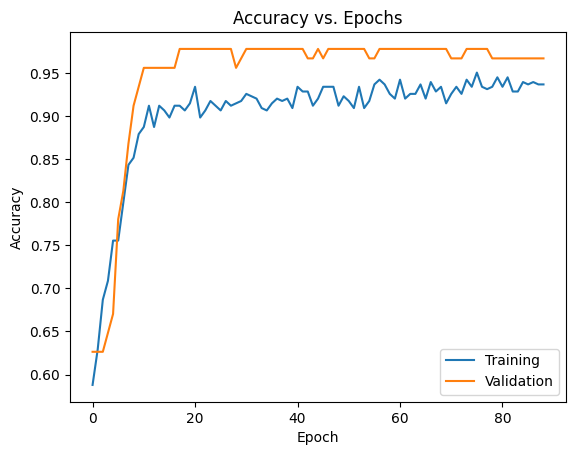

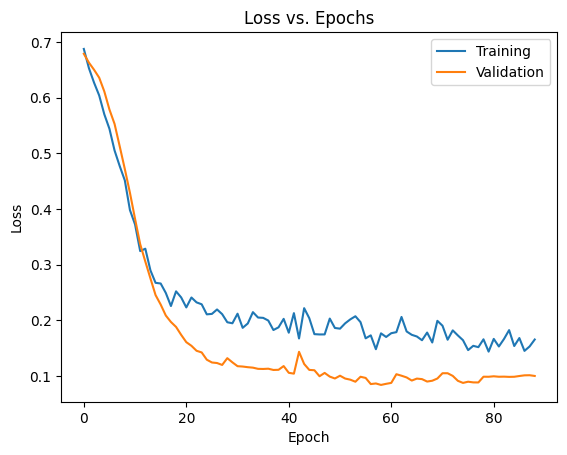

In [25]:
model_9 = set_nn_model_architecture_2()
model_9.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

training_history_9 = model_9.fit(X_train, y_train, epochs=800, validation_split=0.20, batch_size=40,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_9)

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_9.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.1042
test_acc: 95.614 %


# Mejor modelo Adam

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 15, mode =  "min") # if model doesn't improve its performance on validation set in 30 epochs, stop training
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(patience = 10, factor = 0.2)

Model: "my_sequential_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                448       
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 
 dropout1 (Dropout)          (None, 128)               0         
                                                                 
 hiddenlayer4 (Dense)        (None, 128)               16512     
                                                                 
 hiddenlayer5 (Dense)        (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)     

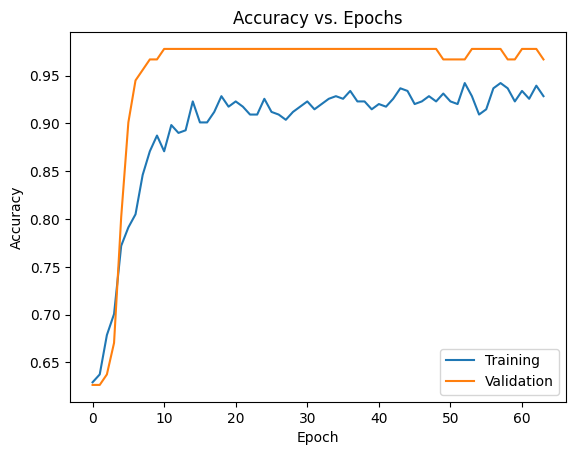

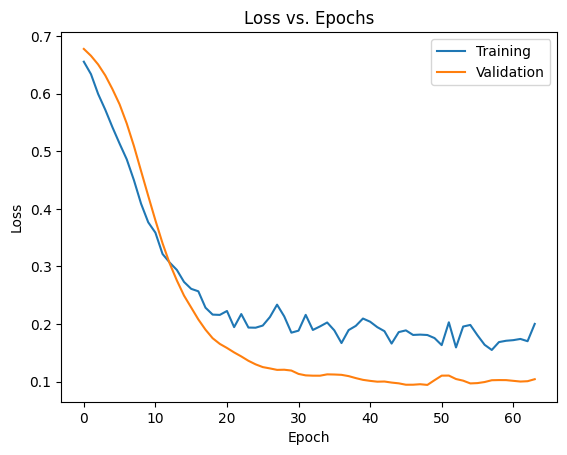

In [20]:
model_10 = set_nn_model_architecture_2()
model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

training_history_10 = model_10.fit(X_train, y_train, epochs=800, validation_split=0.20, batch_size=40,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_10)

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model_10.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.1062
test_acc: 95.614 %


In [26]:
from sklearn.metrics import confusion_matrix

y_pred_9 = model_9.predict(X_test)
y_pred_10 = model_10.predict(X_test)

cm_9 = confusion_matrix(y_test, (y_pred_9 > 0.5))
cm_10 = confusion_matrix(y_test, (y_pred_10 > 0.5))

print("Matriz de Confusión - Modelo 9:")
print(cm_9)

print("\nMatriz de Confusión - Modelo 10:")
print(cm_10)


4/4 [==============================] - 0s 3ms/step
Matriz de Confusión - Modelo 9:
[[73  2]
 [ 2 37]]

Matriz de Confusión - Modelo 10:
[[73  2]
 [ 3 36]]


In [27]:
from sklearn.metrics import precision_score, recall_score

precision_9 = precision_score(y_test, (y_pred_9 > 0.5))
precision_10 = precision_score(y_test, (y_pred_10 > 0.5))

recall_9 = recall_score(y_test, (y_pred_9 > 0.5))
recall_10 = recall_score(y_test, (y_pred_10 > 0.5))

print("Precisión - Modelo 9:", precision_9)
print("Precisión - Modelo 10:", precision_10)

print("Sensibilidad - Modelo 9:", recall_9)
print("Sensibilidad - Modelo 10:", recall_10)

# Puedes calcular la especificidad restando los falsos positivos de los verdaderos negativos y dividiendo por el total de verdaderos negativos.
specificity_9 = cm_9[1, 1] / (cm_9[1, 0] + cm_9[1, 1])
specificity_10 = cm_10[1, 1] / (cm_10[1, 0] + cm_10[1, 1])

print("Especificidad - Modelo 9:", specificity_9)
print("Especificidad - Modelo 10:", specificity_10)


Precisión - Modelo 9: 0.9487179487179487
Precisión - Modelo 10: 0.9473684210526315
Sensibilidad - Modelo 9: 0.9487179487179487
Sensibilidad - Modelo 10: 0.9230769230769231
Especificidad - Modelo 9: 0.9487179487179487
Especificidad - Modelo 10: 0.9230769230769231


In [28]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_9 = accuracy_score(y_test, (y_pred_9 > 0.5))
accuracy_10 = accuracy_score(y_test, (y_pred_10 > 0.5))

f1_score_9 = f1_score(y_test, (y_pred_9 > 0.5))
f1_score_10 = f1_score(y_test, (y_pred_10 > 0.5))

print("Exactitud - Modelo 9:", accuracy_9)
print("Exactitud - Modelo 10:", accuracy_10)

print("F1-Score - Modelo 9:", f1_score_9)
print("F1-Score - Modelo 10:", f1_score_10)


Exactitud - Modelo 9: 0.9649122807017544
Exactitud - Modelo 10: 0.956140350877193
F1-Score - Modelo 9: 0.9487179487179487
F1-Score - Modelo 10: 0.935064935064935


Los optimizadores SGD (Descenso de Gradiente Estocástico) y Adam (Adaptive Moment Estimation) son dos algoritmos esenciales en el aprendizaje automático. Una diferencia clave radica en la sensibilidad a la elección de la tasa de aprendizaje: SGD es más sensible a la tasa de aprendizaje, que es un hiperparámetro crítico, mientras que Adam se adapta automáticamente, reduciendo la necesidad de ajustes precisos. Esta distinción hace que Adam sea más popular en muchas aplicaciones de aprendizaje automático.

Modificando los parametros e hiperparametros como tecnicas para evitar overfitting se alcanzaron a realizar los ultimos dos modelos que muestran un accuracy de 95% pero en estos se les aumentaron a 20% de datos de prueba cosa que en los anteriores fueron de 15%.